Regression DNN

IMPORTING LIBRARIES

In [26]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.layers import Dropout 
from keras import regularizers 
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

READING DATASET

In [3]:
# load data and arrange into Pandas dataframe
df = read_csv("dataset_shade_2.csv")

In [4]:
print(df.head())


       count  density  width  shade  diameter  gauge  needles  feeders  rpm  \
0  19.683333      155   95.0  Black        30     28     2640       88   24   
1  19.683333      155  169.0  Black        30     28     2640       88   24   
2  19.683333      155   91.0  Black        34     28     2976      102   22   
3  19.683333      155  183.0  Black        34     28     2976      102   22   
4  19.683333      155  183.0  Black        34     28     2976      102   18   

   shrinkage_length  shrinkage_width  stitch_length  
0               2.0              2.0       0.281061  
1               2.0              2.0       0.281061  
2               2.0              2.0       0.281082  
3               2.0              2.0       0.281082  
4               2.3              2.0       0.275538  


In [5]:
print(df.describe())

             count      density        width     diameter        gauge  \
count  7022.000000  7022.000000  7022.000000  7022.000000  7022.000000   
mean     22.167065   157.465110   151.155440    32.755056    25.094845   
std       3.563940    14.290807    49.449595     1.775969     1.500075   
min      14.762500   120.000000    65.000000    28.000000    16.000000   
25%      19.683333   145.000000    96.000000    30.000000    24.000000   
50%      22.711538   160.000000   170.000000    34.000000    24.000000   
75%      22.711538   165.000000   185.000000    34.000000    26.000000   
max      49.208333   240.000000  1709.000000    34.000000    32.000000   

           needles      feeders          rpm  shrinkage_length  \
count  7022.000000  7022.000000  7022.000000       7022.000000   
mean   2574.389633    89.023925    20.530333          5.051595   
std     202.943270    22.647840     2.639608          1.342664   
min    1692.000000    11.000000    12.000000          1.000000   
25%

ENCODING CATEGORICAL DATA

In [6]:
# Instantiate LabelEncoder
le = LabelEncoder()
# Encode single column status
df.shade = le.fit_transform(df.shade)
# Print df.head for checking the transformation
df.head()

,count,density,width,shade,diameter,gauge,needles,feeders,rpm,shrinkage_length,shrinkage_width,stitch_length
0,19.683333,155,95.0,0,30,28,2640,88,24,2.0,2.0,0.281061
1,19.683333,155,169.0,0,30,28,2640,88,24,2.0,2.0,0.281061
2,19.683333,155,91.0,0,34,28,2976,102,22,2.0,2.0,0.281082
3,19.683333,155,183.0,0,34,28,2976,102,22,2.0,2.0,0.281082
4,19.683333,155,183.0,0,34,28,2976,102,18,2.3,2.0,0.275538


In [7]:
#Split into features and target (stitch_length)
X = df.drop('stitch_length', axis = 1)
y = df['stitch_length']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [9]:
#Scale dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = Sequential()
model.add(Dense(90, input_dim=11, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [12]:
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_percentage_error'])

In [13]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(X_train_scaled, y_train, batch_size = 128, 
                    epochs = 100, validation_split=0.2, 
                    callbacks =[earlystopping])

Epoch 1/100
36/36 [==============================] - 1s 11ms/step - loss: 0.0216 - mean_absolute_percentage_error: 31.5931 - val_loss: 9.5439e-04 - val_mean_absolute_percentage_error: 19.4648
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 4.6272e-04 - mean_absolute_percentage_error: 5.9745 - val_loss: 4.1578e-04 - val_mean_absolute_percentage_error: 15.0873
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 3.0733e-04 - mean_absolute_percentage_error: 4.8151 - val_loss: 2.7223e-04 - val_mean_absolute_percentage_error: 13.3770
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 1.7248e-04 - mean_absolute_percentage_error: 3.4623 - val_loss: 1.6013e-04 - val_mean_absolute_percentage_error: 11.6817
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 9.2320e-05 - mean_absolute_percentage_error: 2.4851 - val_loss: 1.2448e-04 - val_mean_absolute_percentage_error: 11.0559
Epoch 6/100
36/36 [=============

In [ ]:
#fitting Model
#history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100, callbacks =[earlystopping])

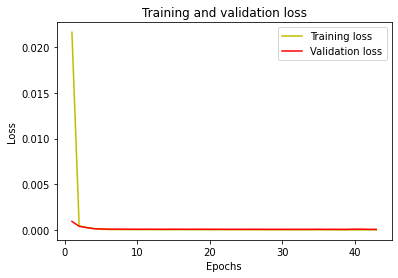

In [14]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
#Predict on test data
predictions = model.predict(X_test_scaled[:10])
y_real=y_test[:10]
print("Predicted values are: ", predictions)
print("Real values are: ", y_real)


1/1 [==============================] - 0s 18ms/step
Predicted values are:  [[0.2998465 ]
 [0.27715096]
 [0.25572166]
 [0.2959124 ]
 [0.24591623]
 [0.30936053]
 [0.28803942]
 [0.2902803 ]
 [0.23544583]
 [0.2830738 ]]
Real values are:  4011    0.298016
1588    0.274094
6666    0.257065
97      0.305101
2084    0.244456
2927    0.311526
4153    0.297101
4210    0.291083
1952    0.238071
689     0.275543
Name: stitch_length, dtype: float64


EVALUATING PREDICTIONS

In [81]:
#R square
from sklearn.metrics import r2_score
r2=r2_score(y_real,predictions)
r2

0.9576955235820408

In [82]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_real, predictions)

0.0039066326294288686

In [83]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_real, predictions)

2.521221097553433e-05

In [85]:
#Root mean squared error
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_real, predictions)
rmse = math.sqrt(mse)
rmse

0.0050211762541793265

PREDICTING NEW DATA

In [22]:
#Testing NEw DATA #
#Split into features and target (Price)
df = read_csv("/content/dataset_shade_new_data.csv")
X = df.drop('stitch_length', axis = 1)
y = df['stitch_length']


In [23]:
X

,count,density,width,shade,diameter,gauge,needles,feeders,rpm,shrinkage_length,shrinkage_width
0,19.683333,155,190,4,34,28,2976,102,22,3.5,5


In [24]:
y

0    0.266297
Name: stitch_length, dtype: float64

In [72]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_scaled = scaler.transform(X)
X_scaled

array([[-0.7001667 , -0.1729877 ,  0.75997302,  0.87486233,  0.69778179,
         1.95456209,  1.99561433,  0.57451105,  0.55777011, -1.14539373,
        -0.74412188]])

In [73]:
feature_names = ['count', 'density', 'width','shade', 'diameter', 'gauge', 'needles', 'feeders', 'rpm', 'shrinkage_length', 'shrinkage_width']
df= pd.DataFrame(X_scaled, columns = feature_names)

In [74]:
predictions = model.predict(df)
print("Predicted values are: ", predictions)
print("Real values are: ", y[0])

1/1 [==============================] - 0s 17ms/step
Predicted values are:  [[0.25095174]]
Real values are:  0.26629704


INTERPRETE PREDICTION

In [ ]:
!pip install lime

In [75]:
import lime
import lime.lime_tabular

In [76]:
feature_names = ['count', 'density', 'width','shade', 'diameter', 'gauge', 'needles', 'feeders', 'rpm', 'shrinkage_length', 'shrinkage_width','stitch_length']

In [77]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_test_scaled, feature_names=feature_names, verbose=True, mode='regression')

157/157 [==============================] - 0s 1ms/step
Intercept 0.281469536539197
Prediction_local [0.25636622]
Right: 0.25095174


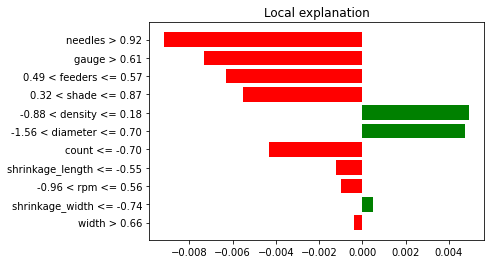

In [78]:
explain_data_point = explainer.explain_instance(df.iloc[0],model.predict, num_features=11)
explain_data_point.as_pyplot_figure();